In [1]:

import pandas as pd
import numpy as np
from scipy import stats
import scipy
from statsmodels.sandbox.stats.multicomp import multipletests 

%pylab inline

import warnings
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('ab_browser_test.csv')
df.head(5)

,userID,browser,slot,n_clicks,n_queries,n_nonclk_queries
0,1,Browser #2,exp,23,32,19
1,3,Browser #4,exp,3,4,2
2,5,Browser #4,exp,29,35,16
3,6,Browser #4,control,12,6,0
4,7,Browser #4,exp,54,68,30


In [3]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566134 entries, 0 to 566133
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   userID            566134 non-null  int64 
 1   browser           566134 non-null  object
 2   slot              566134 non-null  object
 3   n_clicks          566134 non-null  int64 
 4   n_queries         566134 non-null  int64 
 5   n_nonclk_queries  566134 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 25.9+ MB


In [14]:
count_exp = (df['slot'] == 'exp').sum()
count_control = (df['slot'] == 'control').sum()
count_cliks_exp = df[df['slot'] == 'exp']['n_clicks'].sum()
count_cliks_control = df[df['slot'] == 'control']['n_clicks'].sum()

In [ ]:
df[df['slot'] == 'control']['n_clicks'].sum()

## count_cliks_exp = df[df['slot'] == 'exp']['n_clicks'].sum()
_test_
__test__
*test*
//test//

In [22]:
(count_cliks_exp/count_exp)/(count_cliks_control/count_control)-1

0.026867941907439352

In [24]:
(count_cliks_exp-count_cliks_control)/count_cliks_control*100

1.6135689824415809

In [25]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [59]:
sample_exp = get_bootstrap_samples(df[df['slot'] == 'exp']['n_clicks'].to_numpy(),100)
sample_control = get_bootstrap_samples(df[df['slot'] == 'control']['n_clicks'].to_numpy(),100)

In [60]:
df['n_clicks']

0         23
1          3
2         29
3         12
4         54
          ..
566129     1
566130     4
566131     0
566132     2
566133     3
Name: n_clicks, Length: 566134, dtype: int64

In [61]:
sample_exp

array([[ 12,   8,   0, ...,   2,   0,   4],
       [  0,   1,   0, ...,   0,  13,   0],
       [ 37,   0,  50, ..., 109,   4,  11],
       ...,
       [ 49,   4,   0, ...,  11,   1,   7],
       [  0,  30,   0, ...,   3,  25,   1],
       [  3,  12,   4, ...,  30,  10,  31]], dtype=int64)

In [62]:
stat_intervals(sample_exp.mean(axis=1),0.05)

array([11.52143334, 11.65806733])

In [63]:
stat_intervals(sample_control.mean(axis=1),0.05)

array([11.21656153, 11.36177299])

In [71]:
stat_intervals(sample_exp.mean(axis=1),0.05)-stat_intervals(sample_control.mean(axis=1),0.05)

array([0.30487181, 0.29629435])

In [64]:
sample_exp.mean(axis=0).shape

(281580,)

In [65]:
sample_exp.mean(axis=1).shape

(100,)

In [66]:
np.median(sample_control,axis=1)

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.])

In [67]:
np.median(sample_exp,axis=1)

array([5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 4., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5., 5.])

In [68]:
stat_intervals(np.median(sample_exp,axis=1),0.05)

array([5., 5.])

In [70]:
stat_intervals(np.median(sample_control,axis=1),0.05)

array([4., 4.])

In [91]:
np.random.seed(0)
n_boot_samples = 500

In [92]:
boot_samples = get_bootstrap_samples(df[df['slot'] == 'control']['n_clicks'].to_numpy(),n_boot_samples)
control_boot_means = boot_samples.mean(axis=1)
control_boot_chi_squared = (((boot_samples.T-control_boot_means).T)**2).sum(axis=1)

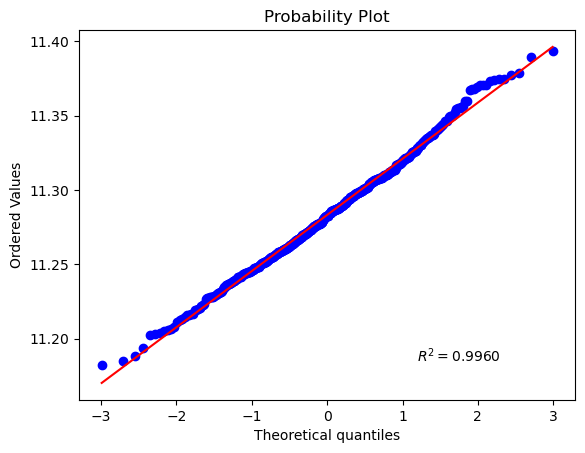

In [95]:
scipy.stats.probplot(control_boot_means,plot=plt,rvalue=True)
plt.show()

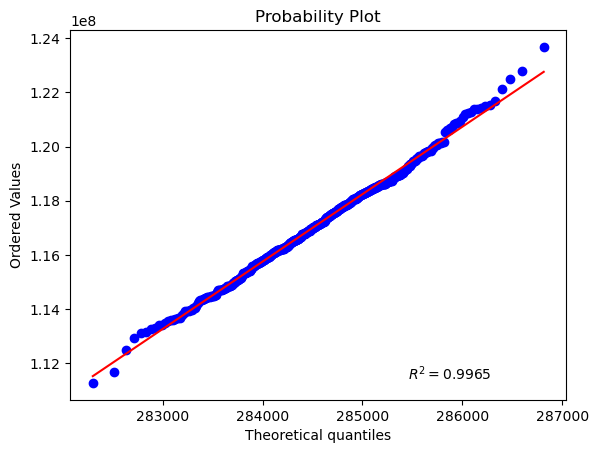

In [96]:
scipy.stats.probplot(control_boot_chi_squared, dist="chi2", 
                     sparams=((df['slot'] == 'control').sum()-1), plot=plt,rvalue=True)
plt.show()

In [99]:
stats.mannwhitneyu(df[(df['slot'] == 'exp')].n_clicks, df[(df['slot'] == 'control')].n_clicks)

MannwhitneyuResult(statistic=41184125116.0, pvalue=6.247235801370162e-75)

In [109]:
res = []
for i in df['browser'].unique():
    df_browser = df[df['browser'] == i]
    res.append(stats.mannwhitneyu(df_browser[(df_browser['slot'] == 'exp')].n_clicks, df_browser[(df_browser['slot'] == 'control')].n_clicks).pvalue)
    print(stats.mannwhitneyu(df_browser[(df_browser['slot'] == 'exp')].n_clicks, df_browser[(df_browser['slot'] == 'control')].n_clicks))

MannwhitneyuResult(statistic=1542917872.0, pvalue=0.0544877208394482)
MannwhitneyuResult(statistic=3076629747.0, pvalue=0.8152123531690997)
MannwhitneyuResult(statistic=1178625929.5, pvalue=0.0)
MannwhitneyuResult(statistic=134411881.0, pvalue=0.07480120286021603)
MannwhitneyuResult(statistic=144001333.0, pvalue=0.9073331277747075)
MannwhitneyuResult(statistic=2547597959.5, pvalue=0.5148110304420064)


In [110]:
res

[0.0544877208394482,
 0.8152123531690997,
 0.0,
 0.07480120286021603,
 0.9073331277747075,
 0.5148110304420064]

In [112]:
multipletests(res, alpha = 0.05, method = 'holm')

(array([False, False,  True, False, False, False]),
 array([0.2724386 , 1.        , 0.        , 0.29920481, 1.        ,
        1.        ]),
 0.008512444610847103,
 0.008333333333333333)

In [116]:
df_control = df[df['slot'] == 'control']
df_exp = df[df['slot'] == 'exp']

In [117]:
df_bro = pd.DataFrame(df.browser.unique(), columns = ['browser'])
df_bro = df_bro.set_index('browser')
df_bro['p'] = 0.
for bro in df_bro.index:    
    df_control_bro = df_control[df_control.browser == bro]
    df_exp_bro = df_exp[df_exp.browser == bro]
    pvalue = stats.mannwhitneyu(df_control_bro.n_clicks, df_exp_bro.n_clicks).pvalue
    df_bro.loc[[bro], ['p']] = pvalue

In [119]:
df_bro

,p
browser,
Browser #2,0.054488
Browser #4,0.815212
Browser #14,0.000000
Browser #17,0.074801
Browser #20,0.907333
Browser #22,0.514811


In [120]:
reject, p_corrected, a1, a2 = multipletests(df_bro.p, 
                                            alpha = 0.05, 
                                            method = 'holm') 

df_bro['p_corrected'] = p_corrected
df_bro['reject'] = reject

In [121]:
df_bro

,p,p_corrected,reject
browser,,,
Browser #2,0.054488,0.272439,False
Browser #4,0.815212,1.000000,False
Browser #14,0.000000,0.000000,True
Browser #17,0.074801,0.299205,False
Browser #20,0.907333,1.000000,False
Browser #22,0.514811,1.000000,False


In [127]:
ratio_control = []
ratio_exp = []
for i in df['browser'].unique():
    ratio_control.append((df_control[df_control['browser'] == i]['n_nonclk_queries'].sum())/(df_control[df_control['browser'] == i]['n_queries'].sum())*100)
    ratio_exp.append((df_exp[df_exp['browser'] == i]['n_nonclk_queries'].sum())/(df_exp[df_exp['browser'] == i]['n_queries'].sum())*100)
    

In [128]:
ratio_control

[45.96274717919465,
 46.97092963514274,
 57.59041136008114,
 36.29936674628208,
 40.540484743383296,
 40.593976593513354]

In [129]:
ratio_exp

[44.982746948554706,
 45.14294190358467,
 43.755617361273295,
 36.93741284866483,
 38.97737648371716,
 39.85394721969546]

In [131]:
np.array(ratio_control)-np.array(ratio_exp)

array([ 0.98000023,  1.82798773, 13.834794  , -0.6380461 ,  1.56310826,
        0.74002937])